## Austin Housing Market during Pandemic - Muhammad Zain Raza


# Libraries

I import some of the relevant libraries for your convinience, but feel free to make changes or import additional libraries, as needed.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [ ]:
from sklearn import metrics
import sklearn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

#Modeling The Housing Maket

In this project, we want to model the housing rental market in Austin from 2019 to 2021. While visualizing the raw data can be very informative, in many real-world cases, it is hard to visually find trends in raw data, hence, the need for modeling. Our goal is to explore two non-parametric and flexible models. Specifically, we will use Guassian processes and KLLR method to model price as a function of time. We want to study the impact of pandemic on different sectors of the housing market.

In this project, we only look at `Single Family Residentials` and `Apartments`, so we can ignore the other property types. The data cleaning is already done for you; so you can simply dive into modeling. For data cleaning, we first convert `Close Date` column to a datetime data type. We then create a new column that computes the number of dates passed since January 1st, 2018.


In [ ]:
!pip install --upgrade git+https://github.com/afarahi/kllr.git
import kllr as kl
from datetime import datetime
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct, RBF
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.gaussian_process.kernels import ExpSineSquared, RationalQuadratic, WhiteKernel

  Cloning https://github.com/afarahi/kllr.git to /tmp/pip-req-build-ep503c7_
  Running command git clone --filter=blob:none --quiet https://github.com/afarahi/kllr.git /tmp/pip-req-build-ep503c7_
  Resolved https://github.com/afarahi/kllr.git to commit 26a35bc2311f4fe823fc6fc53dce829814a7cd5e
  Preparing metadata (setup.py) ... done
  Created wheel for kllr: filename=kllr-2.101-py3-none-any.whl size=22255 sha256=6a26fc623926b64b4aaba99dd0a0470be6f4b1750a6f8c22a4b3a82604b70502
  Stored in directory: /tmp/pip-ephem-wheel-cache-k0gsbqwh/wheels/33/6e/9f/481dd0e0b2e8def17700ca0a14d0f09a358d24ecb78fb0ceb5
Successfully built kllr


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/afarahi/Scientific-Machine-Learning/main/Austin_rental_price.csv')[['Close$/SqFt', 'Close Date', 'Property Sub Type']]

# cleaning
# this is our independent variable
df['Close$/SqFt'] *= 1000.0 # change the unit to per 1000 sq ft

df['Close Date'] = pd.to_datetime(df['Close Date'])
df.head()

# this is our dependent variable
df['delta_time'] = (df['Close Date'] - datetime(2018, 1, 1)).dt.days

# This coding is unnecessary but you might find it useful
df['Type'] = 9999
df['Type'][df['Property Sub Type'] == 'Single Family Resi'] = 1
df['Type'][df['Property Sub Type'] == 'Condominium'] = 2
df['Type'][df['Property Sub Type'] == 'Duplex'] = 3
df['Type'][df['Property Sub Type'] == 'Apartment'] = 4

# drop all rows with a missing value
df.dropna(inplace=True)

df

<ipython-input-5-2736bc3d5ea0>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Close Date'] = pd.to_datetime(df['Close Date'])
<ipython-input-5-2736bc3d5ea0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'][df['Property Sub Type'] == 'Single Family Resi'] = 1
<ipython-input-5-2736bc3d5ea0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'][df['Property Sub Type'] == 'Condominium'] = 2
<ipython-input-5-2736bc3d5ea0>:17: SettingWithCopyWarning: 
A value is 

,Close$/SqFt,Close Date,Property Sub Type,delta_time,Type
0,2240.0,2019-08-26,See Remarks,602,9999
1,1480.0,2019-08-12,Condominium,588,2
2,1730.0,2019-08-13,Condominium,589,2
3,1700.0,2019-08-10,Condominium,586,2
4,1680.0,2019-08-10,Condominium,586,2
...,...,...,...,...,...
50848,1020.0,2021-01-22,Single Family Resi,1117,1
50849,1050.0,2021-01-21,Single Family Resi,1116,1
50850,1180.0,2021-01-15,Single Family Resi,1110,1
50851,1310.0,2021-01-30,Single Family Resi,1125,1


### 3.1 Visualizing the raw data

First, we visualize raw data. We make a scatter plot of price / 1000 sq ft as a function of `delta_time`. A vertical line that marks the beginning of the COVID-19 pandemic (March, 1st. 2020)

We make two separate plots, one for `Single Family Resi` and one for `Apartment`. And then answer the above question for each type separately.

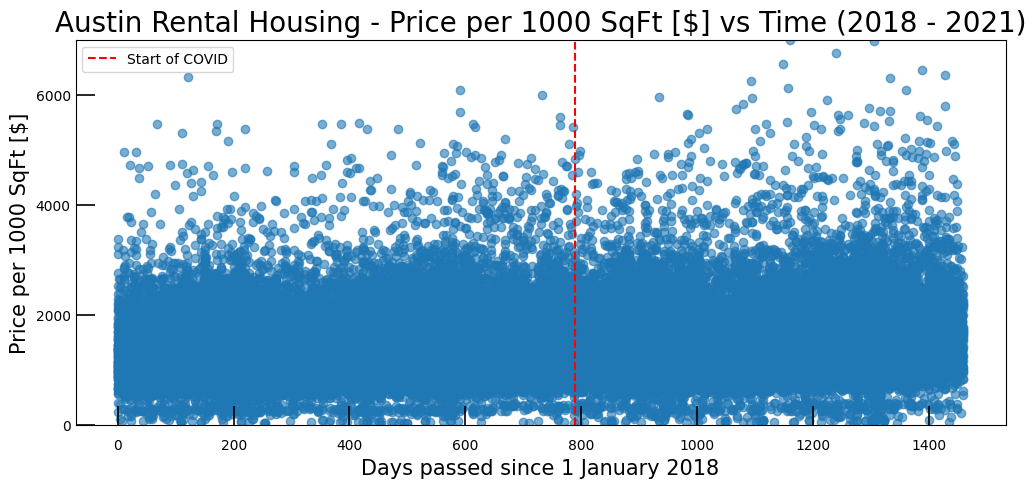

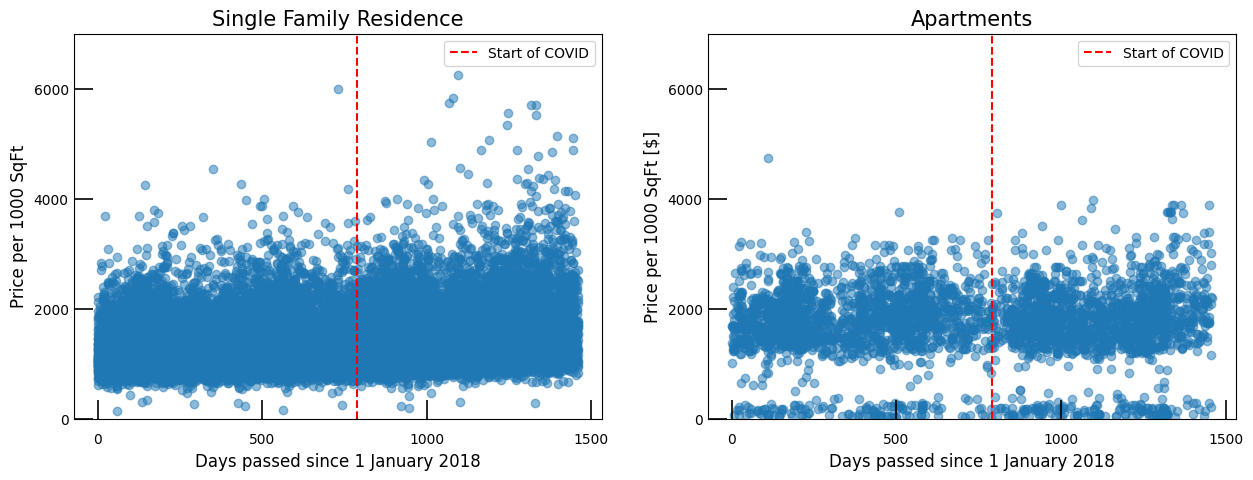

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(df['delta_time'], df['Close$/SqFt'], alpha = 0.6)
March01 = (datetime(2020,3,1)-datetime(2018,1,1)).days

plt.axvline(x = March01, color = 'red', linestyle = 'dashed', label = 'Start of COVID')
plt.title('Austin Rental Housing - Price per 1000 SqFt [$] vs Time (2018 - 2021)', size = 20)
plt.ylabel('Price per 1000 SqFt [$]', size = 15)
plt.xlabel('Days passed since 1 January 2018', size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.ylim([0,7000])
plt.legend()

df_single, df_apt = df.loc[df['Type']==1], df.loc[df['Type']==4]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(df_single['delta_time'], df_single['Close$/SqFt'], alpha = 0.5)
plt.axvline(x = March01, color = 'red', linestyle = 'dashed', label = 'Start of COVID')
plt.title('Single Family Residence', size = 15)
plt.ylabel('Price per 1000 SqFt', size = 12)
plt.xlabel('Days passed since 1 January 2018', size = 12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.ylim([0,7000])
plt.legend()

plt.subplot(1,2,2)
plt.scatter(df_apt['delta_time'], df_apt['Close$/SqFt'], alpha = 0.5)
plt.axvline(x = March01, color ='red', linestyle = 'dashed', label = 'Start of COVID')
plt.title('Apartments', size = 15)
plt.ylabel('Price per 1000 SqFt [$]', size = 12)
plt.xlabel('Days passed since 1 January 2018', size = 12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.ylim([0,7000])
plt.legend()

From the scatter plots it is very difficult to tell a trend in prices because there are too many points that are crowded together and it is difficult to distinguish any pattern from them. A close estimate can be made that the prices are increasing over time in the long term trend.

**Now let's model these data with KLLR and Gaussian Processes.**

We choose a gaussian kernel and fit a KLLR method.

In [ ]:
lm = kl.kllr_model(kernel_type = 'gaussian', kernel_width = 35)
plt.figure(figsize = (12,5))
x_apt, y_exp_apt, intercept_exp, slope_exp, scatter_exp, skew, kurt = lm.fit(df_apt['delta_time'], df_apt['Close$/SqFt'], xrange=[0, max(df_apt['delta_time'])], bins=250, nBootstrap=1)
plt.plot(x_apt, y_exp_apt, lw=3.0, color='blue', label ='Apartments')
x_single, y_exp_single, intercept_exp, slope_exp, scatter_exp, skew, kurt = lm.fit(df_single['delta_time'], df_single['Close$/SqFt'], xrange=[0, max(df_single['delta_time'])], bins=250, nBootstrap=1)
plt.plot(x_single, y_exp_single, lw=3.0, color='orange', label = 'Single Family Resi')
plt.axvline(x = March01, color ='red', linestyle = 'dashed', label = 'Start of COVID')
plt.xlabel('Days Passed since January 1, 2018', size=15)
plt.ylabel('Price per 1000 sq ft ($)', size=15)
plt.title('Austin Rental Market', size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()

### 3.3 Gaussian Processes

Now, we construct a kernel and fit a Gaussian processes. Then visualize the fitted model for each property type (`Single Family Resi` and `Apartment`).

Note that it would be difficult to run a GP on the entire data set, so we randomly select a subset of this data set to fit a model. For instance we can select only one tenth of the original data set.

In [ ]:
X_single = np.array(df_single['delta_time'])[:, np.newaxis][::10]
y_single = np.array(df_single['Close$/1000SqFt'])[::10]
X_apt = np.array(df_apt['delta_time'])[:, np.newaxis][::2]
y_apt = np.array(df_apt['Close$/1000SqFt'])[::2]

In [ ]:
#Long-term kernel
long_term_trend_kernel = 50**2 * RBF(length_scale=100, length_scale_bounds="fixed")
noise_kernel = WhiteKernel(noise_level=1, noise_level_bounds=(10, 1e6))
gp_kernel = (long_term_trend_kernel + noise_kernel)

In [ ]:
gaussian_process_single = GaussianProcessRegressor(kernel=gp_kernel, alpha = 0.0)
gaussian_process_single.fit(X_single, y_single)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.0,
                         kernel=50**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1))

In [ ]:
gaussian_process_apt = GaussianProcessRegressor(kernel=gp_kernel, alpha = 0.0)
gaussian_process_apt.fit(X_apt, y_apt)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.0,
                         kernel=50**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1))

In [ ]:
Xlin = np.linspace(0.0, 1400.0)[:, np.newaxis]
y_mean_single, y_std_single = gaussian_process_single.predict(Xlin, return_std=True)
y_mean_apt, y_std_apt = gaussian_process_apt.predict(Xlin, return_std=True)

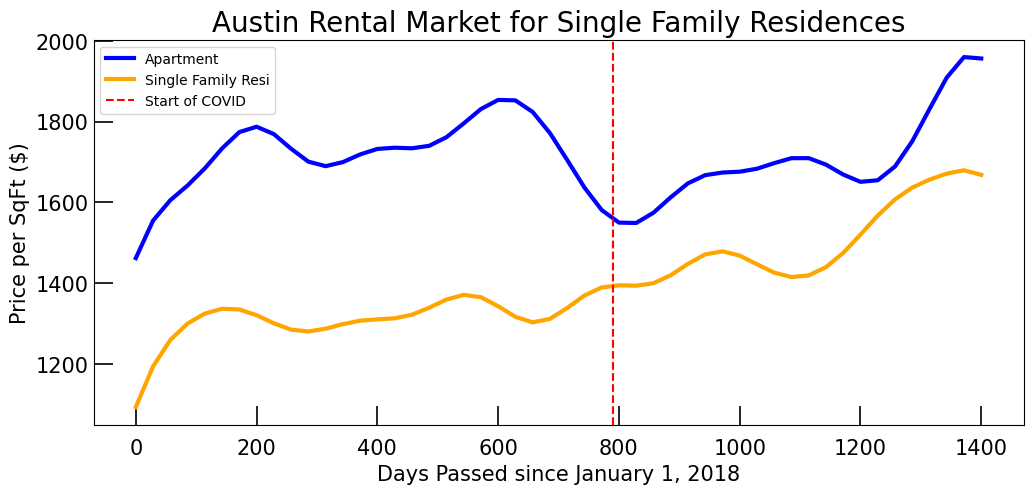

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(Xlin, y_mean_apt, color='blue', lw=3.0, label='Apartment')
plt.plot(Xlin, y_mean_single, color='orange', lw=3.0, label='Single Family Resi')
plt.xlabel('Days Passed since January 1, 2018', size=15)
plt.ylabel('Price per 1000SqFt ($)', size=15)
plt.axvline(x = March01, color ='red', linestyle = 'dashed', label = 'Start of COVID')
plt.title('Austin Rental Market for Single Family Residences', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()

The kernel chosen has length scale of 100 because of the dataset we have which has a lot of observations and the scale of X axis is large. There is noise in the data so a noise kernel has also been chose. However, seasonality kernel has been dropped because it is difficult to observe any seasonal trend in data as such. The irrgularities kernel has also been dropped because it was making the plot unsmooth.

### 3.4 Solution comparison

We now over plot GP and KLLR solutions on the same plot.

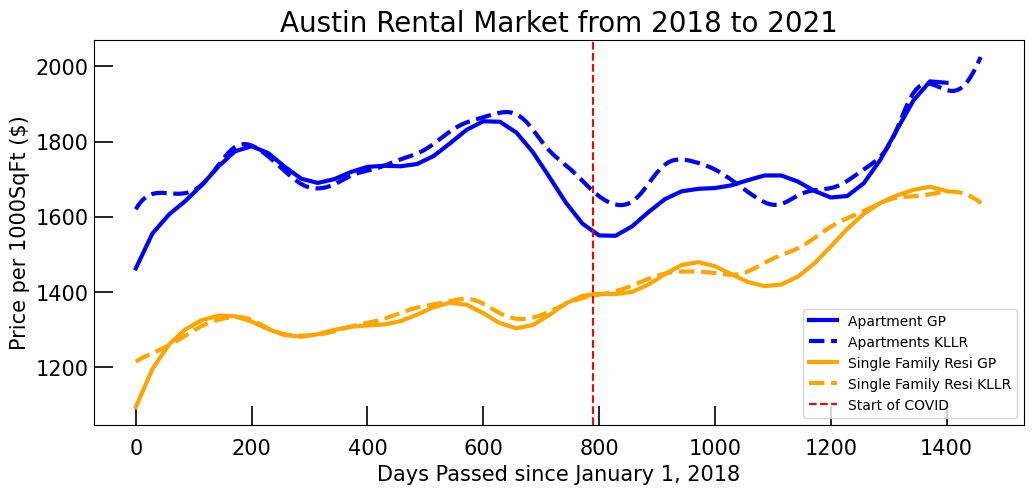

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(Xlin, y_mean_apt, color='blue', lw=3.0, label='Apartment GP')
plt.plot(x_apt, y_exp_apt, lw=3.0, color='blue', linestyle = 'dashed', label ='Apartments KLLR')
plt.plot(Xlin, y_mean_single, color='orange', lw=3.0, label='Single Family Resi GP')
plt.plot(x_single, y_exp_single, lw=3.0, color='orange', linestyle = 'dashed', label = 'Single Family Resi KLLR')
plt.xlabel('Days Passed since January 1, 2018', size=15)
plt.ylabel('Price per 1000SqFt ($)', size=15)
plt.axvline(x = March01, color ='red', linestyle = 'dashed', label = 'Start of COVID')
plt.title('Austin Rental Market from 2018 to 2021', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()

*your answer*

### 3.5 Interpretation
Now, let's go back an interpret the results.


Ans.
The results of both methods don't differ much from each other as the plots are very similar. The patterns and trends are also very similar. As far as COVID is concerned, the data does not show that there was any major shift in the prices due to COVID. The prices have generally increased after COVID. For Apartments, the prices were in a decline before COVID and they started recovering after COVID so that could be credited to COVID. For Single Family Residences, the prices continued their normal trend even after COVID so no anomally was observed there.

# THE END